In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
# Importing dataset
raw_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

raw_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Column rename
raw_data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [5]:
raw_data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
raw_data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [8]:
raw_data[raw_data.duplicated()].sum()

ID                   0.0
Balance              0.0
Qual_miles           0.0
cc1_miles            0.0
cc2_miles            0.0
cc3_miles            0.0
Bonus_miles          0.0
Bonus_trans          0.0
Flight_miles_12mo    0.0
Flight_trans_12      0.0
Days_since_enroll    0.0
Award                0.0
dtype: float64

#Perform EDA

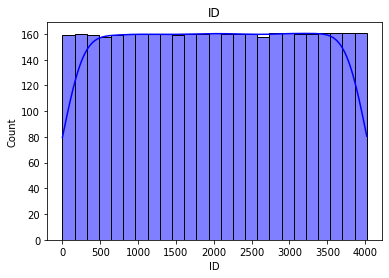

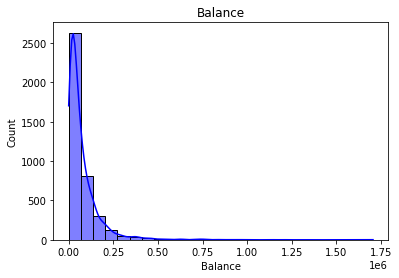

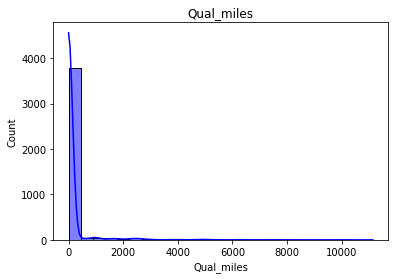

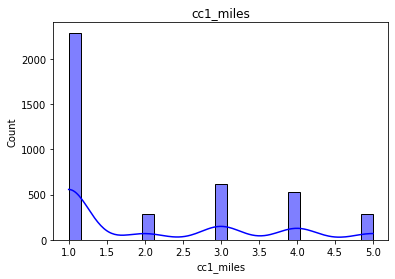

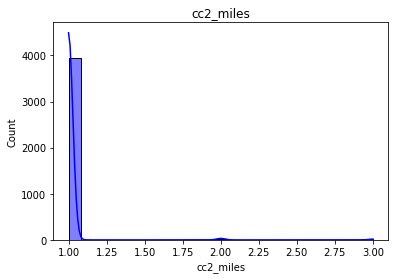

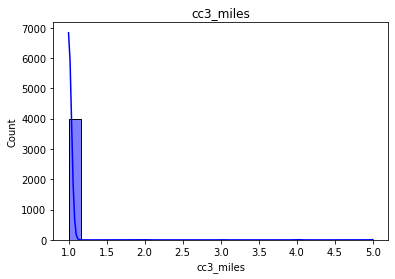

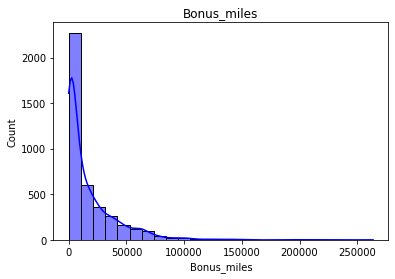

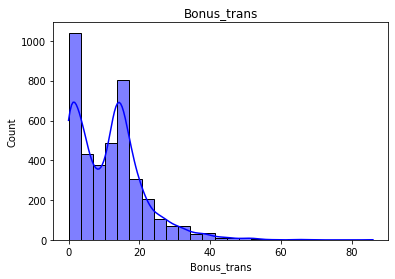

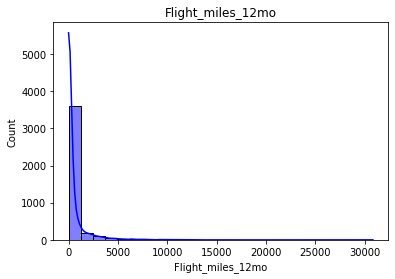

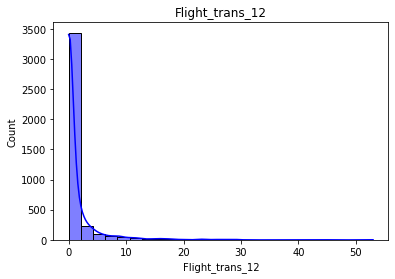

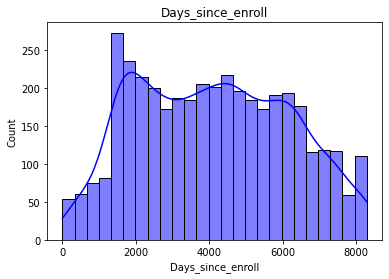

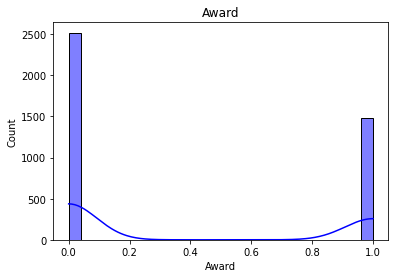

In [9]:
for i in raw_data.columns:
    data = raw_data.copy()
    sns.histplot(data = data[i],bins = 25, kde=True, color='b')
    plt.title(i)
    plt.show()

#Outliers Detection

In [10]:
data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

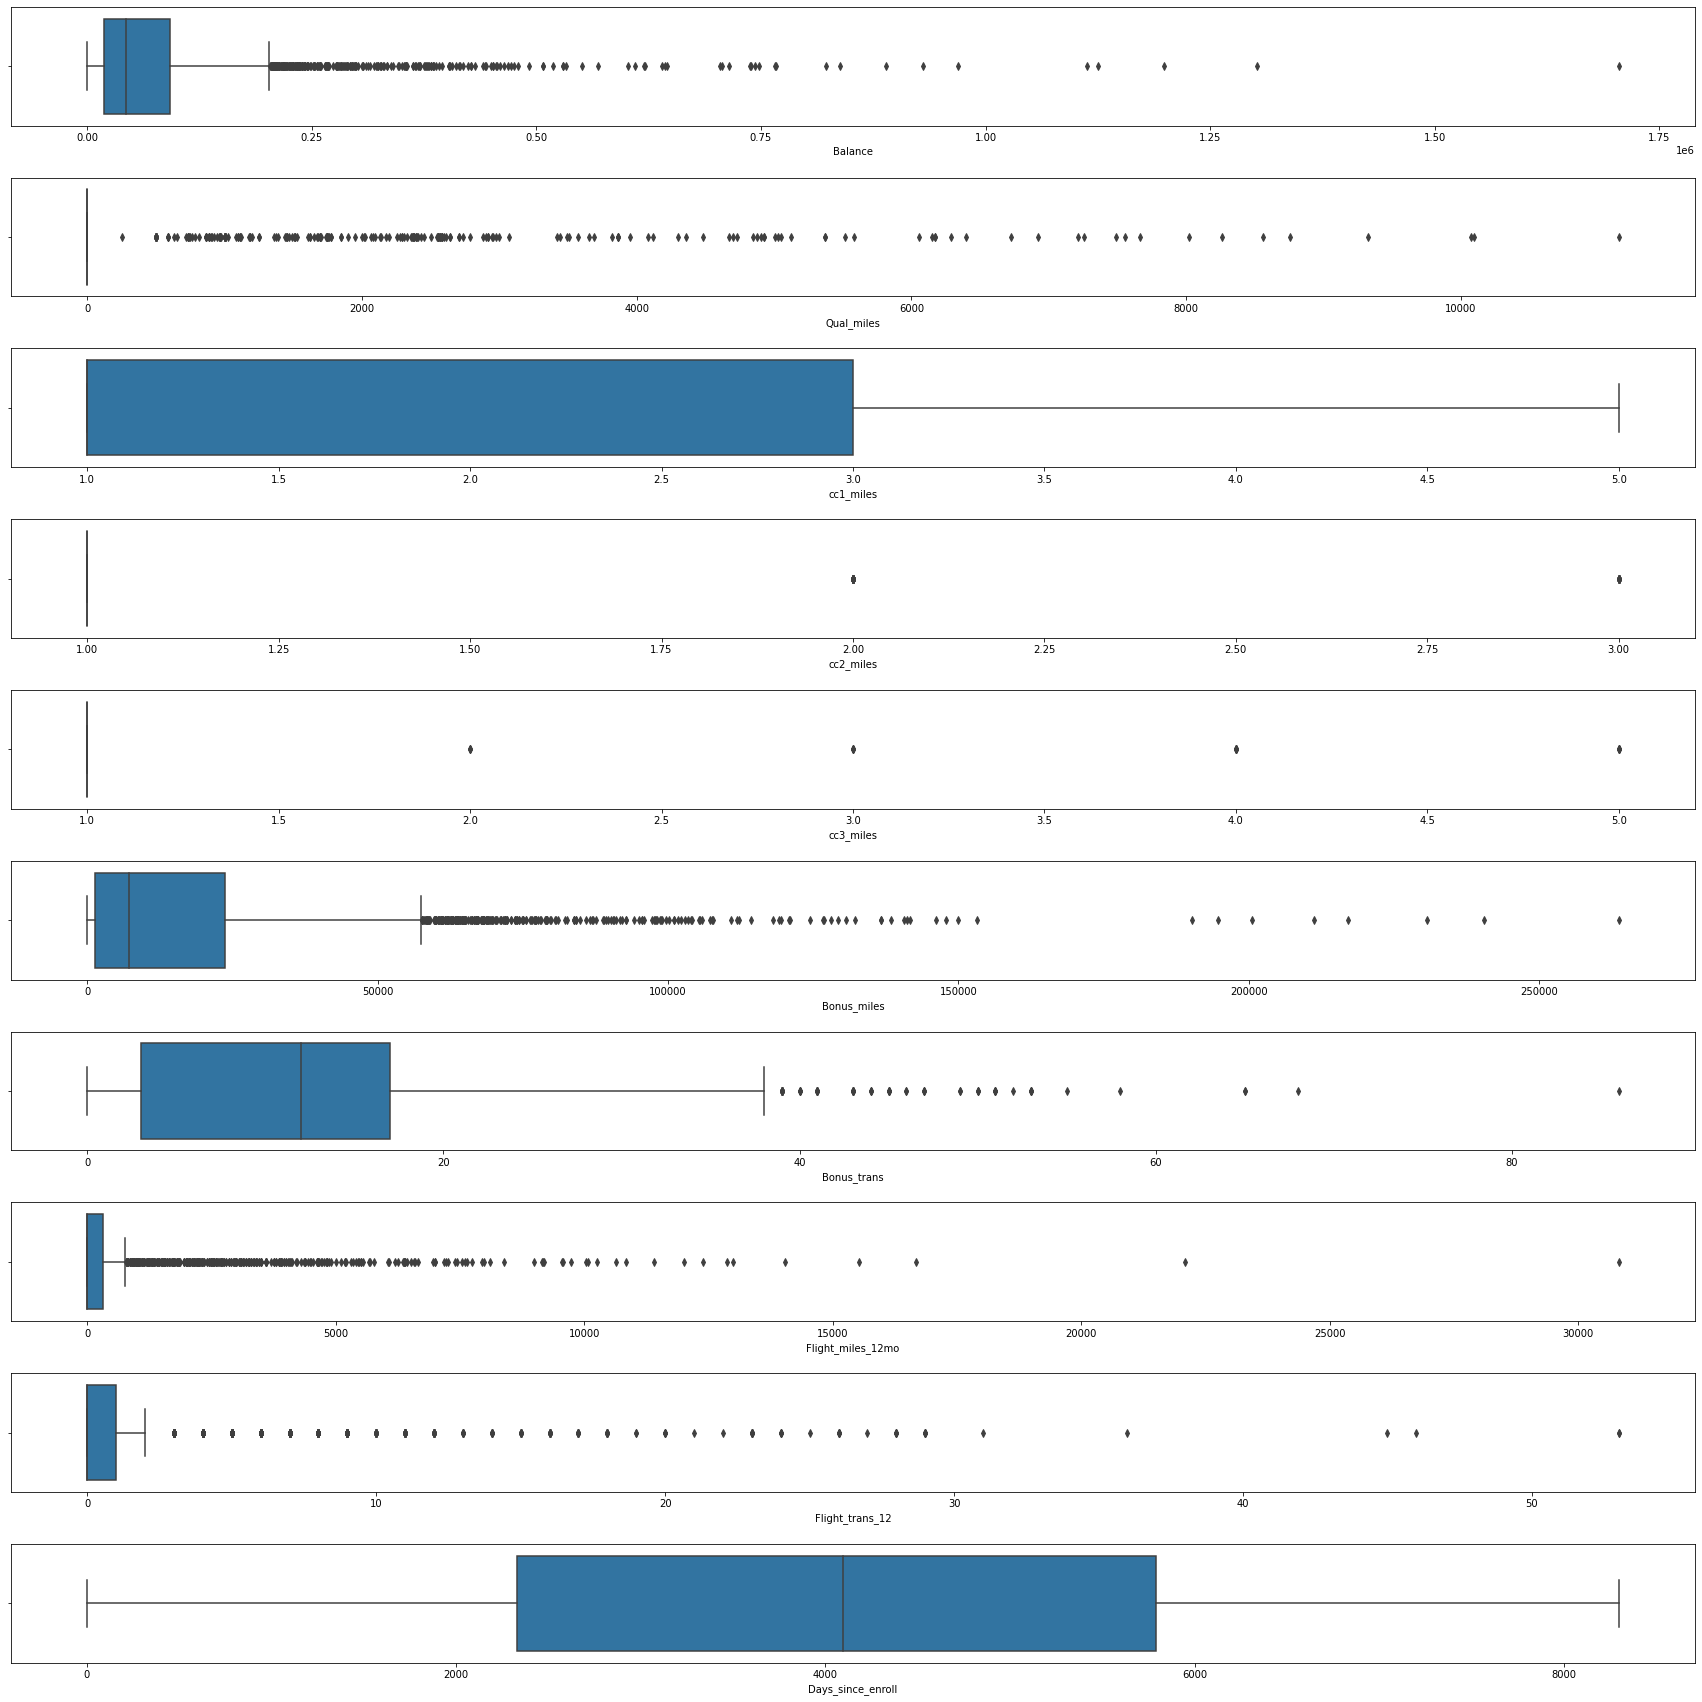

In [11]:
data1 = data.copy() 

fig, axes=plt.subplots(10,1,figsize=(24,24),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=data1,ax=axes[0])
sns.boxplot(x='Qual_miles',data=data1,ax=axes[1])
sns.boxplot(x='cc1_miles',data=data1,ax=axes[2])
sns.boxplot(x='cc2_miles',data=data1,ax=axes[3])
sns.boxplot(x='cc3_miles',data=data1,ax=axes[4])
sns.boxplot(x='Bonus_miles',data=data1,ax=axes[5])
sns.boxplot(x='Bonus_trans',data=data1,ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=data1,ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=data1,ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=data1,ax=axes[9])
plt.tight_layout(pad=2.0)
plt.show()

#Data Visualization

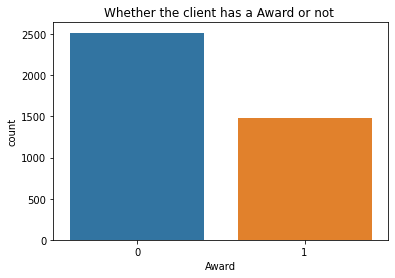

In [12]:
sns.countplot(x='Award', data=data, order=data['Award'].value_counts().index)
plt.title('Whether the client has a Award or not ', size=12)
plt.show()

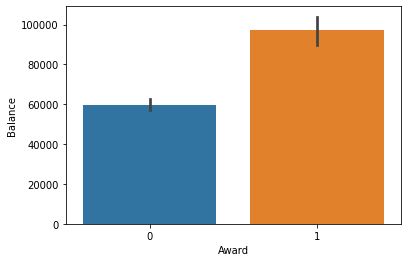

In [13]:
balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
sns.barplot(x='Award', y='Balance', data= balance)
plt.xlabel('Award')
plt.ylabel('Balance')
plt.show()

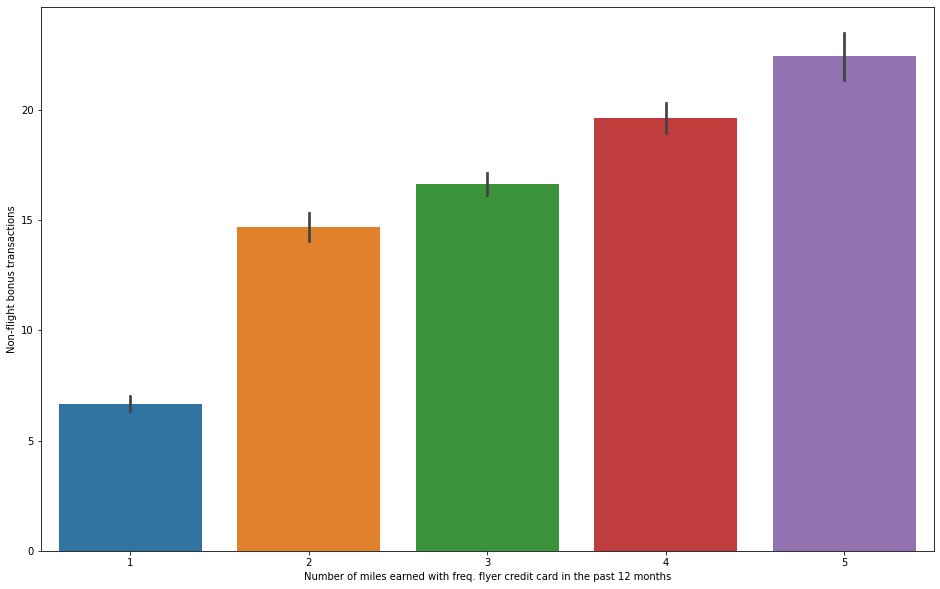

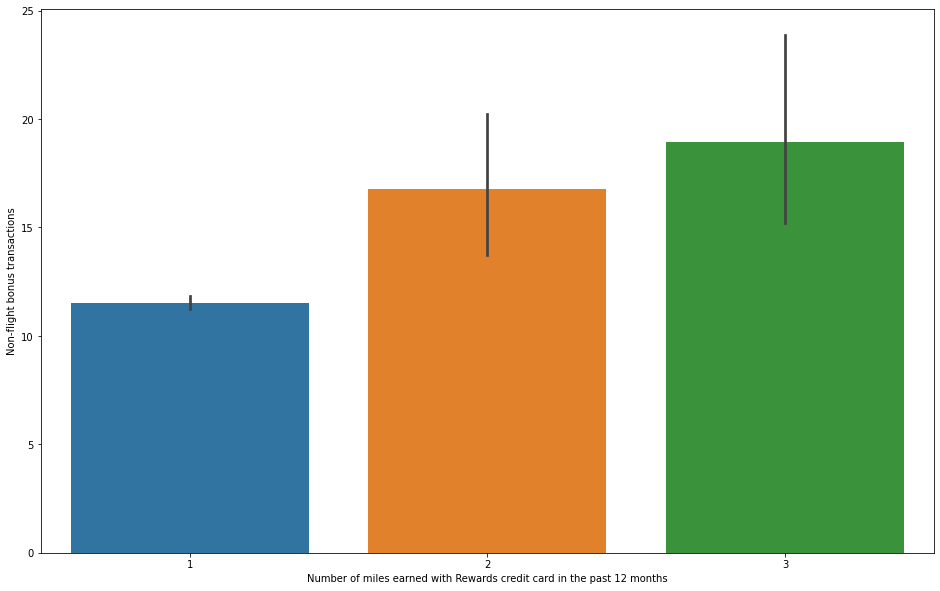

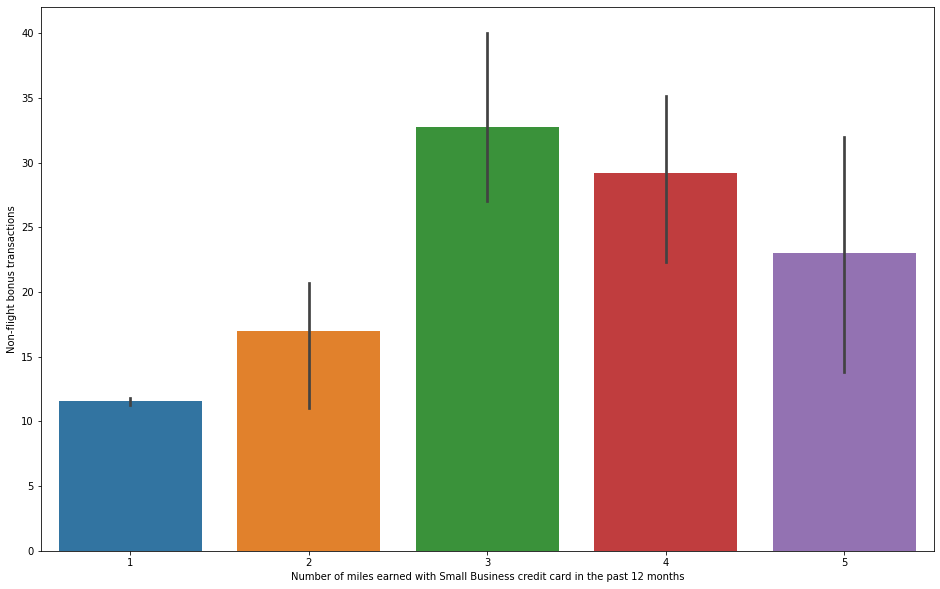

In [14]:
plt.figure(figsize = (16,10))
bonus1 = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
sns.barplot(x='cc1_miles', y='Bonus_trans', data= bonus1)
plt.xlabel('Number of miles earned with freq. flyer credit card in the past 12 months')
plt.ylabel('Non-flight bonus transactions')
plt.show()

plt.figure(figsize = (16,10))
bonus2 = data[['cc2_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
sns.barplot(x='cc2_miles', y='Bonus_trans', data= bonus2)
plt.xlabel('Number of miles earned with Rewards credit card in the past 12 months')
plt.ylabel('Non-flight bonus transactions')
plt.show()

plt.figure(figsize = (16,10))
bonus3 = data[['cc3_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
sns.barplot(x='cc3_miles', y='Bonus_trans', data= bonus3)
plt.xlabel('Number of miles earned with Small Business credit card in the past 12 months')
plt.ylabel('Non-flight bonus transactions')
plt.show()

#Data Featurizing

**1) Standardize our Data**

In [15]:
from sklearn.preprocessing import StandardScaler

data_std = StandardScaler().fit_transform(data)
data_std.shape

(3999, 12)

**1) Normalize our data**

In [16]:
from sklearn.preprocessing import MinMaxScaler

data_nor = MinMaxScaler().fit_transform(data)
data_nor.shape

(3999, 12)

#KMeans Clustering

**1) For our Standardized data**

In [17]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2).fit(data_std)
    wcss.append(kmeans.inertia_)

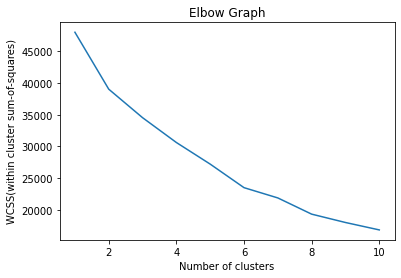

In [18]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(within cluster sum-of-squares)')
plt.show()

**2) For our Normalized data**

In [19]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2).fit(data_nor)
    wcss.append(kmeans.inertia_)

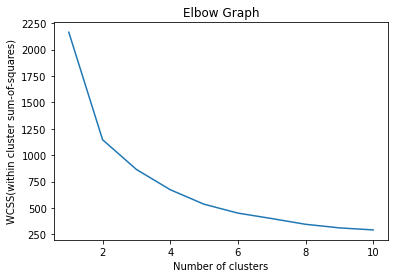

In [20]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(within cluster sum-of-squares)')
plt.show()

#KMeans for 4 clusters

In [21]:
# Cluster algorithm using K=4
c4 = KMeans(4,random_state=30).fit(data_std)
c4.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [22]:
c4.inertia_

30616.623636092663

In [23]:
data2 = data.copy()
data2['clusters4id']=c4.labels_
data2

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters4id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [24]:
data2.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1760.203822,193805.509554,805.235669,2.203822,1.038217,1.000000,32486.566879,27.675159,5498.547771,16.171975,4668.407643,0.821656
1,1,1096.081538,57040.856923,106.786923,1.363077,1.018462,1.000769,5894.290000,7.986923,228.442308,0.704615,5710.401538,0.254615
2,2,3134.555987,40044.381230,102.826537,1.397411,1.016828,1.000000,6384.379288,7.898382,203.922977,0.605825,2153.937864,0.215534
3,3,1517.669007,128267.363089,152.659980,3.970913,1.002006,1.048144,46073.626881,19.523571,365.551655,1.105316,5000.825476,0.690070


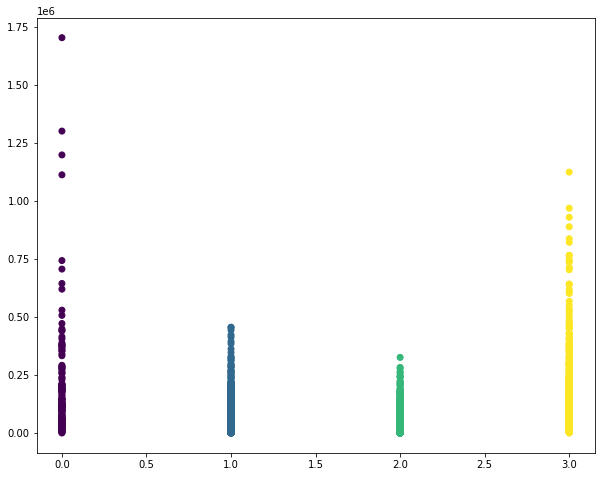

In [25]:
plt.figure(figsize=(10, 8))  
plt.scatter(data2['clusters4id'],data2['Balance'], c=c4.labels_)
plt.show()

In [26]:
data2['Kmeans_label'] = c4.labels_

In [27]:
data2.groupby('Kmeans_label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters4id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,1760.203822,193805.509554,805.235669,2.203822,1.038217,1.000000,32486.566879,27.675159,5498.547771,16.171975,4668.407643,0.821656,0.0
1,1096.081538,57040.856923,106.786923,1.363077,1.018462,1.000769,5894.290000,7.986923,228.442308,0.704615,5710.401538,0.254615,1.0
2,3134.555987,40044.381230,102.826537,1.397411,1.016828,1.000000,6384.379288,7.898382,203.922977,0.605825,2153.937864,0.215534,2.0
3,1517.669007,128267.363089,152.659980,3.970913,1.002006,1.048144,46073.626881,19.523571,365.551655,1.105316,5000.825476,0.690070,3.0


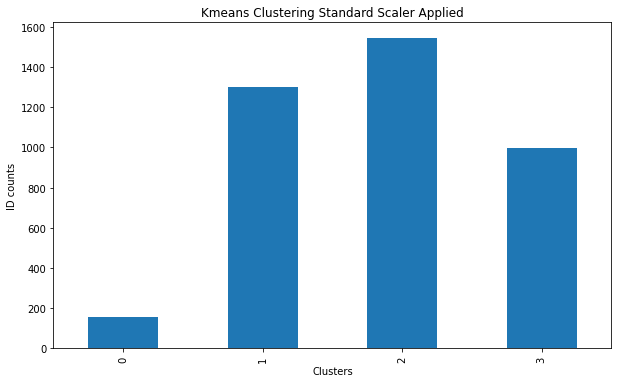

In [28]:
plt.subplots(figsize=(10, 6))
data2.groupby(['Kmeans_label']).count()['clusters4id'].plot(kind='bar')
plt.title('Kmeans Clustering Standard Scaler Applied')
plt.xlabel('Clusters')
plt.ylabel('ID counts')
plt.show()

#KMeans for 5 clusters

In [29]:
# Cluster algorithm using K=5
c5 = KMeans(5,random_state=30).fit(data_std)
c5.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [30]:
c5.inertia_

26894.799956288873

In [31]:
data2 = data.copy()
data2['clusters5id']=c5.labels_
data2

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters5id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [32]:
data2.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3136.609612,39509.544437,103.595787,1.369980,1.017117,1.000000,6108.656353,7.720211,197.167874,0.589862,2145.896643,0.202765
1,1,1751.262821,194803.871795,810.397436,2.198718,1.038462,1.000000,32475.410256,27.737179,5510.717949,16.224359,4681.352564,0.820513
2,2,1551.750000,125831.045098,162.603922,3.935294,1.001961,1.001961,44400.135294,19.283333,369.844118,1.108824,4948.466667,0.701961
3,3,1095.266098,57027.711404,97.356090,1.354538,1.018619,1.000776,5833.957331,7.953452,229.442979,0.706749,5712.619860,0.249030
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


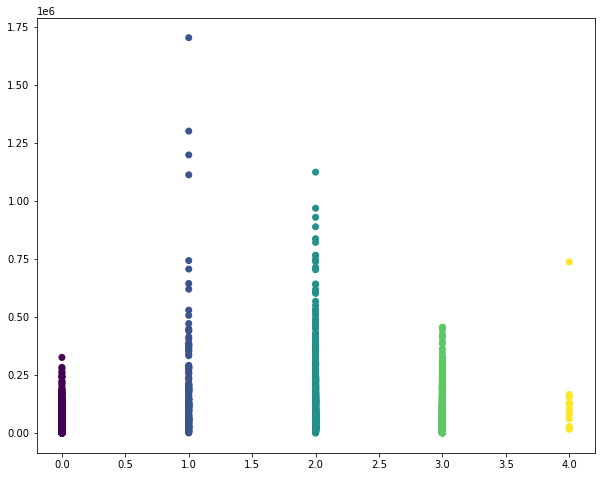

In [33]:
plt.figure(figsize=(10, 8))  
plt.scatter(data2['clusters5id'],data2['Balance'], c=c5.labels_)
plt.show()

In [34]:
data2['Kmeans_label'] = c5.labels_
data2.groupby('Kmeans_label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters5id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,3136.609612,39509.544437,103.595787,1.369980,1.017117,1.000000,6108.656353,7.720211,197.167874,0.589862,2145.896643,0.202765,0.0
1,1751.262821,194803.871795,810.397436,2.198718,1.038462,1.000000,32475.410256,27.737179,5510.717949,16.224359,4681.352564,0.820513,1.0
2,1551.750000,125831.045098,162.603922,3.935294,1.001961,1.001961,44400.135294,19.283333,369.844118,1.108824,4948.466667,0.701961,2.0
3,1095.266098,57027.711404,97.356090,1.354538,1.018619,1.000776,5833.957331,7.953452,229.442979,0.706749,5712.619860,0.249030,3.0
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.0


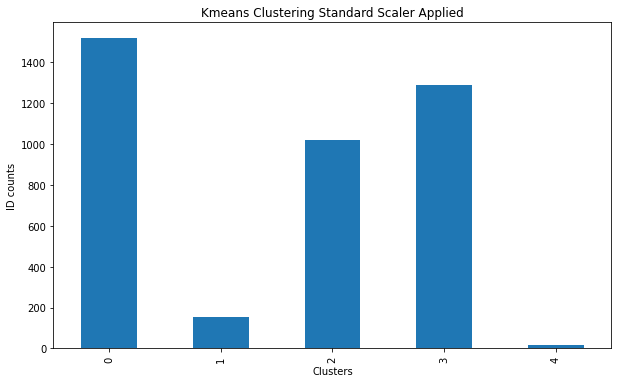

In [35]:
plt.subplots(figsize=(10, 6))
data2.groupby(['Kmeans_label']).count()['clusters5id'].plot(kind='bar')
plt.title('Kmeans Clustering Standard Scaler Applied')
plt.xlabel('Clusters')
plt.ylabel('ID counts')
plt.show()

#KMeans for 6 clusters

In [36]:
# Cluster algorithm using K=6
c6 = KMeans(6,random_state=30).fit(data_std)
c6.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [37]:
c6.inertia_

23491.10844528163

In [38]:
data2 = data.copy()
data2['clusters6id']=c6.labels_
data2

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters6id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [39]:
data2.groupby('clusters6id').agg(['mean']).reset_index()

,clusters6id,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1702.224490,195548.054422,837.353741,2.224490,1.000000,1.000000,33151.136054,27.877551,5610.346939,16.503401,4757.380952,0.829932
1,1,3138.286001,39525.380442,97.763563,1.369056,1.000000,1.000000,5999.302076,7.596115,202.339585,0.599464,2138.315472,0.197589
2,2,1095.645490,57162.992157,105.219608,1.357647,1.000000,1.000784,5745.508235,7.837647,232.982745,0.709020,5710.021961,0.249412
3,3,1561.472710,125398.950292,166.593567,3.930799,1.000000,1.001949,44216.336257,19.287524,373.531189,1.119883,4929.950292,0.702729
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


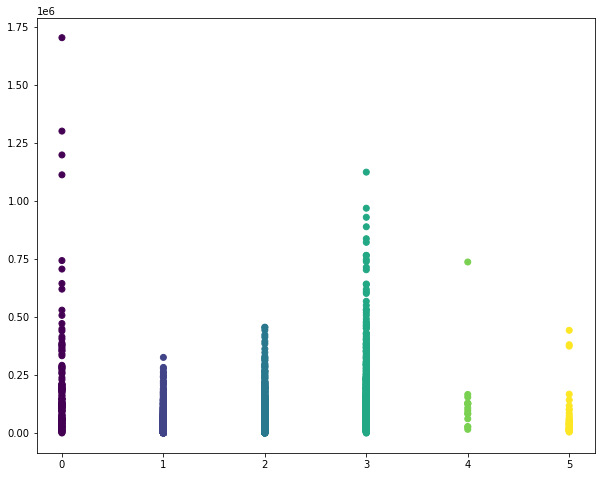

In [40]:
plt.figure(figsize=(10, 8))  
plt.scatter(data2['clusters6id'],data2['Balance'], c=c6.labels_)
plt.show()

In [41]:
data2['Kmeans_label'] = c6.labels_
data2.groupby('Kmeans_label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusters6id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,1702.224490,195548.054422,837.353741,2.224490,1.000000,1.000000,33151.136054,27.877551,5610.346939,16.503401,4757.380952,0.829932,0.0
1,3138.286001,39525.380442,97.763563,1.369056,1.000000,1.000000,5999.302076,7.596115,202.339585,0.599464,2138.315472,0.197589,1.0
2,1095.645490,57162.992157,105.219608,1.357647,1.000000,1.000784,5745.508235,7.837647,232.982745,0.709020,5710.021961,0.249412,2.0
3,1561.472710,125398.950292,166.593567,3.930799,1.000000,1.001949,44216.336257,19.287524,373.531189,1.119883,4929.950292,0.702729,3.0
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,4.0
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,5.0


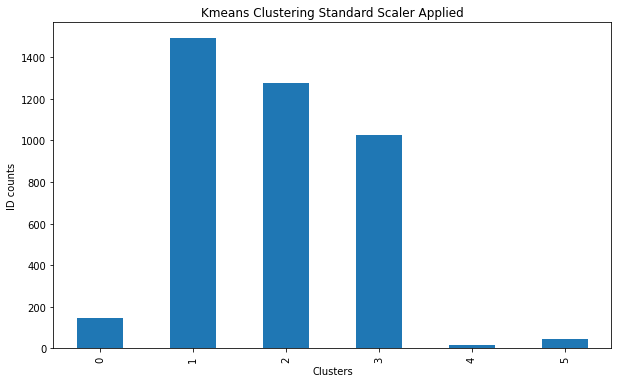

In [42]:
plt.subplots(figsize=(10, 6))
data2.groupby(['Kmeans_label']).count()['clusters6id'].plot(kind='bar')
plt.title('Kmeans Clustering Standard Scaler Applied')
plt.xlabel('Clusters')
plt.ylabel('ID counts')
plt.show()

#Hierarchical Clustering

In [43]:
data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [44]:
data_std.shape

(3999, 12)

In [45]:
data_nor.shape

(3999, 12)

**1) Dendogram for Standarized Data**

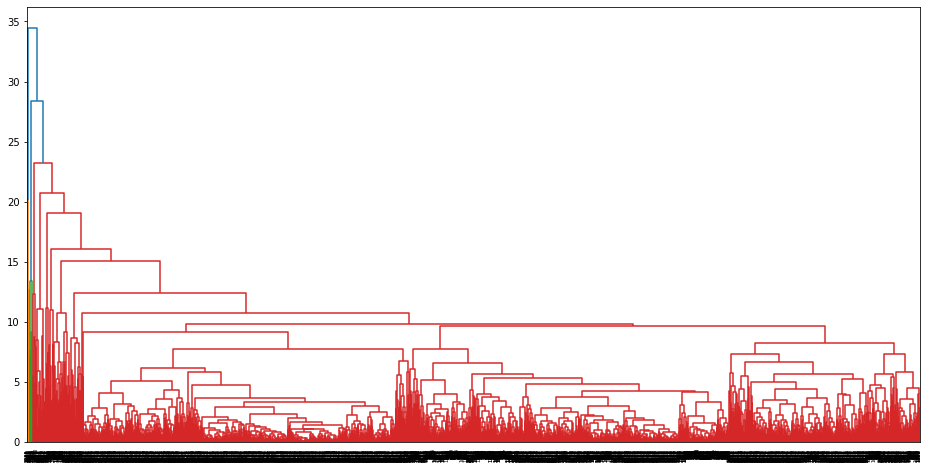

In [46]:
plt.figure(figsize=(16,8))
sch.dendrogram(sch.linkage(data_std, method='complete'))
plt.show()

**1) Dendogram for Normalized Data**

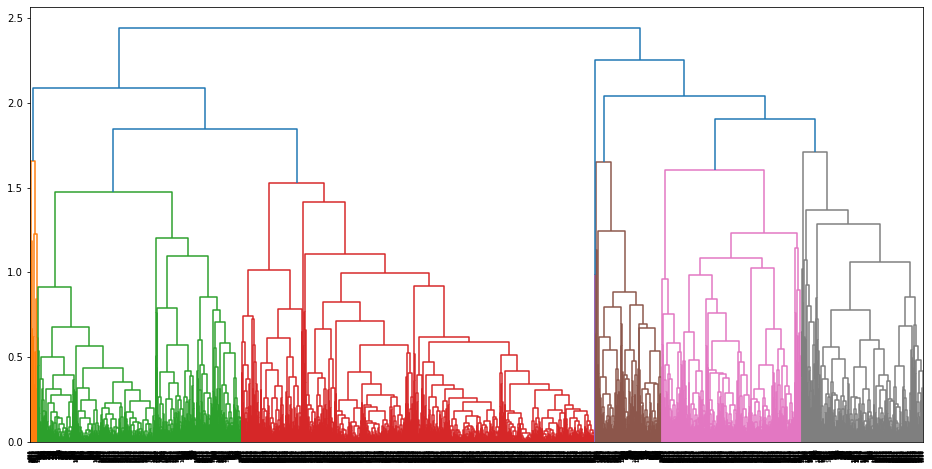

In [47]:
plt.figure(figsize=(16,8))
sch.dendrogram(sch.linkage(data_nor, method='complete'))
plt.show()

Apply PCA

In [48]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df = pca_std.fit_transform(data_std)

In [49]:
print(pca_std.singular_values_)

[117.45181285  87.52421792  78.64793243  63.94851715  62.63657788
  61.91156422  57.15380846  51.03898123  37.96085035]


In [50]:
#Agglomerative Clustering

ac = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred = ac.fit_predict(pca_std_df)
print(y_pred.shape)
y_pred

(3999,)


array([0, 0, 0, ..., 1, 0, 0])

In [51]:
data3 = data.copy()
data3['Hierarchical_labels'] = ac.labels_
data3.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [52]:
data3.groupby('Hierarchical_labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,
0,2307.166475,36273.649770,7.445853,1.087558,1.03341,1.000000,3109.720046,6.371544,102.221774,0.352535,3587.029954,0.009793
1,1790.553248,102236.258506,248.956253,2.805126,1.00000,1.021653,27911.518338,15.614229,734.558551,2.156871,4526.307998,0.646929


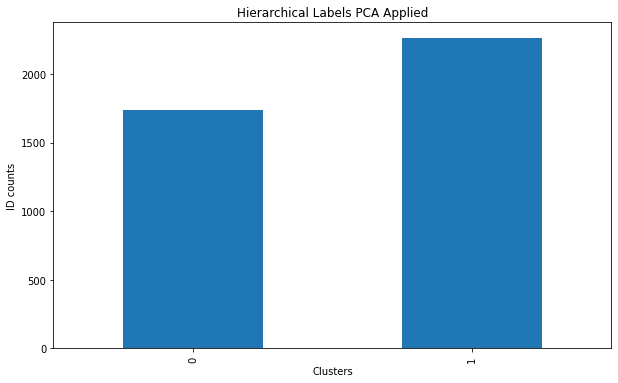

In [53]:
plt.subplots(figsize=(10, 6))
data3.groupby(['Hierarchical_labels']).count()['ID'].plot(kind='bar')
plt.title('Hierarchical Labels PCA Applied')
plt.xlabel('Clusters')
plt.ylabel('ID counts')
plt.show()

#DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [54]:
data4 = data.copy()

array = data4.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]])

In [55]:
X = StandardScaler().fit_transform(array)

In [56]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
data4['DBSCAN_labels'] = dbscan.labels_
data4.groupby('DBSCAN_labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,
-1,1525.517857,345109.785714,1137.071429,3.000000,1.089286,1.392857,72679.928571,32.178571,5747.000000,15.285714,5096.642857,0.839286
0,2020.516054,70002.152582,124.025944,2.053172,1.000000,1.000000,16219.194452,11.233753,385.548677,1.173645,4104.233239,0.362959
1,2154.214286,45781.714286,0.000000,1.000000,3.000000,1.000000,20147.571429,16.928571,410.000000,1.714286,4137.642857,0.357143
2,2400.600000,39187.040000,0.000000,1.120000,2.000000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000
3,1757.400000,102022.600000,0.000000,3.600000,1.000000,4.000000,90060.800000,27.000000,210.000000,0.600000,4730.200000,0.400000
4,1246.333333,56112.333333,0.000000,3.333333,1.000000,5.000000,105025.666667,28.000000,366.666667,1.000000,5223.666667,1.000000
5,1088.333333,62703.666667,9935.000000,1.666667,1.000000,1.000000,8572.333333,11.333333,1166.666667,6.000000,5699.000000,1.000000


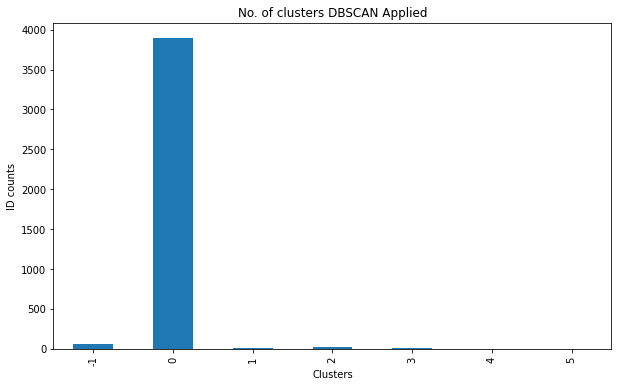

In [59]:
plt.subplots(figsize=(10, 6))
data4.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.title('No. of clusters DBSCAN Applied')
plt.xlabel('Clusters')
plt.ylabel('ID counts')
plt.show()

#Run DBSCAN on MinMax Scaled data

In [60]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(data_nor)

DBSCAN(eps=1, min_samples=22)

In [61]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [62]:
data5 = data.copy()

data5['DBSCAN_labels'] = dbscan.labels_
data5.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [63]:
data5.groupby('DBSCAN_labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


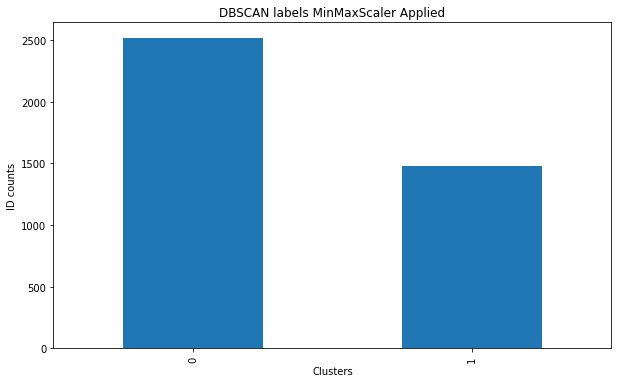

In [64]:
plt.subplots(figsize=(10, 6))
data5.groupby(['DBSCAN_labels']).count()['ID'].plot(kind='bar')
plt.title('DBSCAN labels MinMaxScaler Applied')
plt.xlabel('Clusters')
plt.ylabel('ID counts')
plt.show()

In [65]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data5.loc[data5.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data5.loc[data5.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [66]:
clusters = pd.concat([cluster1,cluster2],axis=1)
clusters

,Cluster1_avg,Cluster2_avg
ID,2173.169182,1745.592843
Balance,59807.839555,97053.051317
Qual_miles,87.602462,240.196489
cc1_miles,1.705322,2.661715
cc2_miles,1.013900,1.015530
cc3_miles,1.008737,1.018231
Bonus_miles,10227.689039,28905.414585
Bonus_trans,9.142971,15.782579
Flight_miles_12mo,226.292295,857.501013
Flight_trans_12,0.652502,2.599595


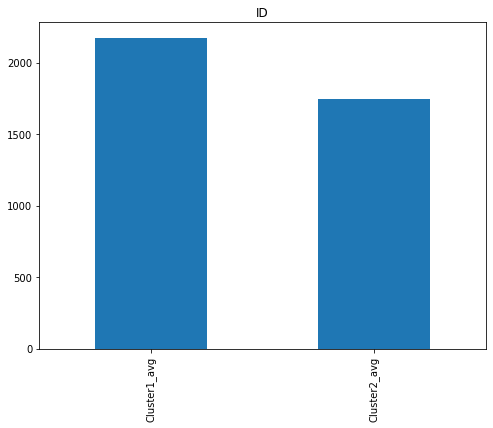

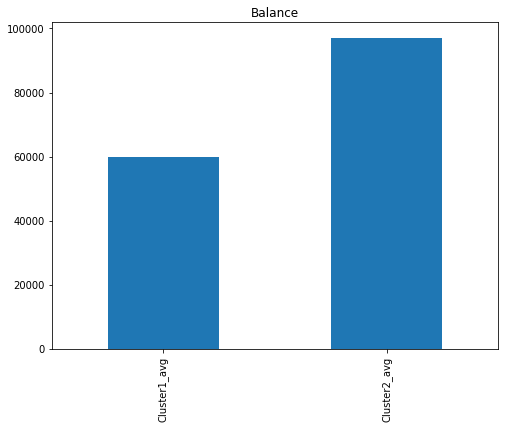

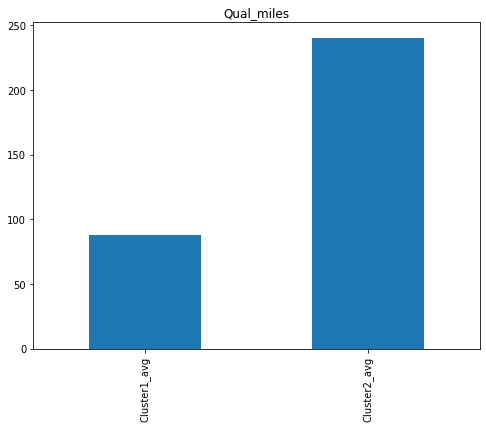

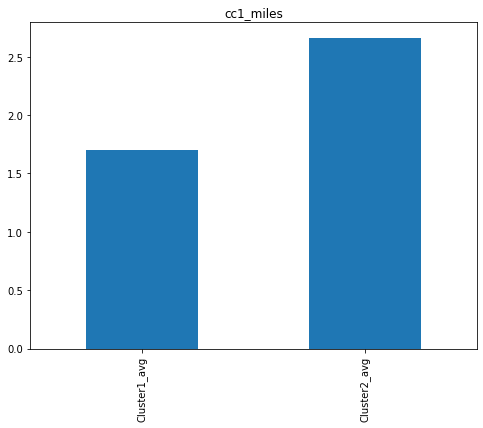

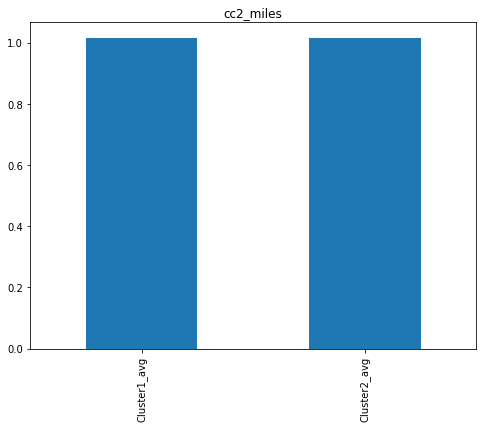

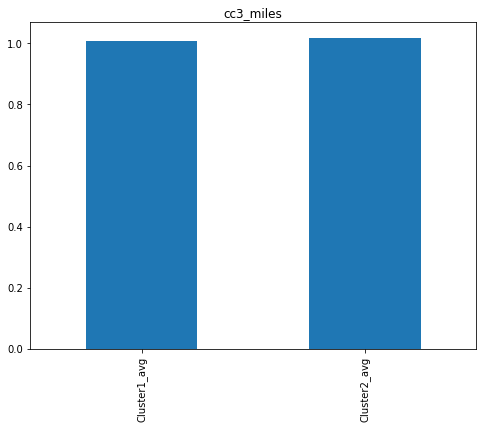

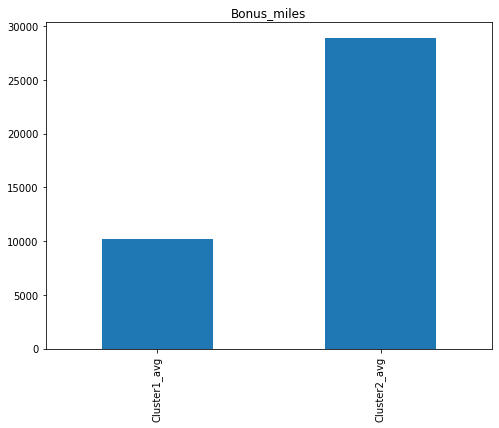

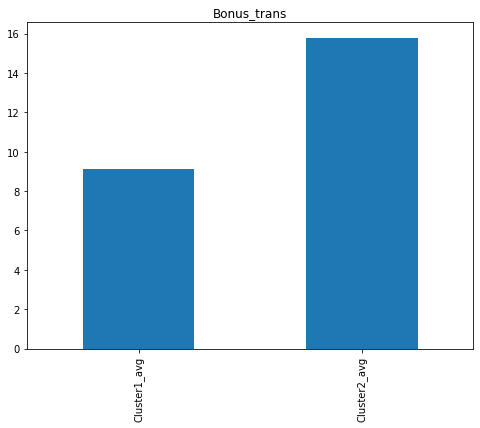

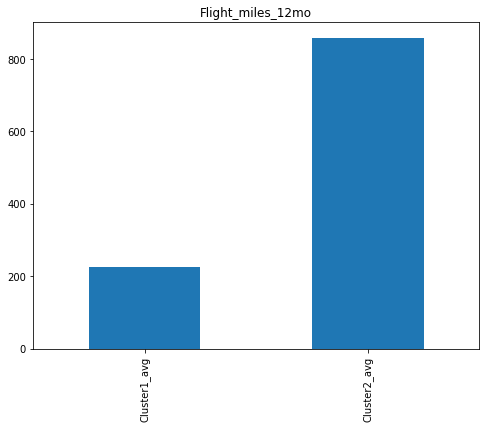

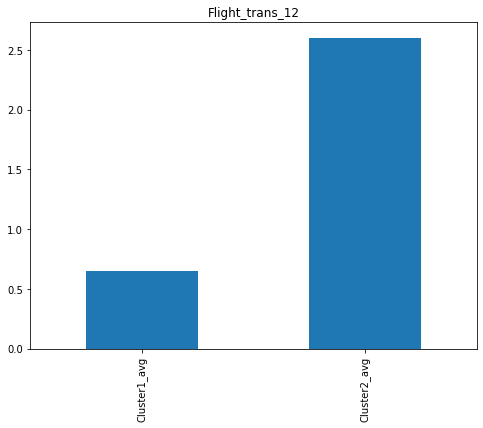

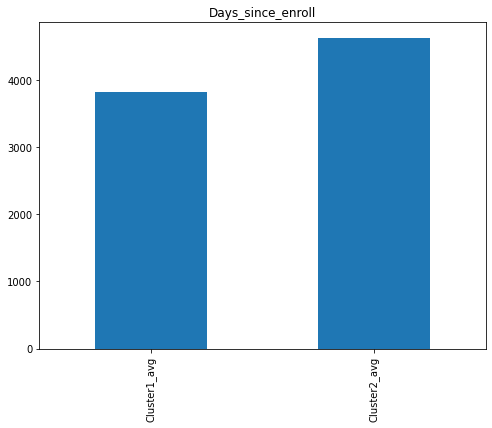

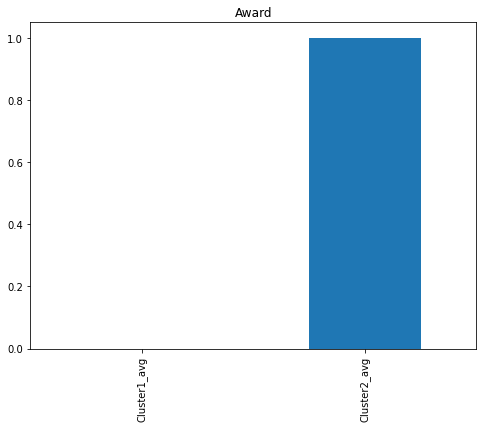

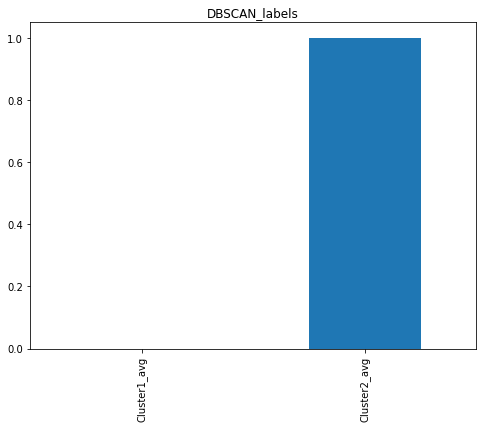

In [67]:
for i , row in clusters.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = clusters.xs(i ,axis = 0)
    plt.title(i, fontsize=12)
    j.plot(kind='bar')
    plt.show()

#Conclusion

The Standard Scaler found less score so cannot be used for further model building.
Applying PCA on standardized data with 95% variance it gives 9 PCA components & shows fluctuation in model score.
KMeans clustering is sensitive to outliers.
DBSCAN gives us two clusters which is easier to analyze.